# 概要
- [URL](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)
- データサイエンスの学生がコンペに挑む前に技術を磨くのにはうってつけとのこと。
- Upvote が多い notebook
    - 7917, https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
    - 4994, https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard
    - 1442, https://www.kaggle.com/dansbecker/submitting-from-a-kernel
    - 1363, https://www.kaggle.com/apapiu/regularized-linear-models
    - 1075, https://www.kaggle.com/dansbecker/handling-missing-values
    - 1064, https://www.kaggle.com/vanshjatana/applied-machine-learning

## コンペの評価
- https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation
- **家の販売価格を予測する**：`SalePrice` 変数を予測する
- Metric：Root-Mean-Squared-Error（RMSE）
    - 予測値の対数と実際の販売価格の対数の間で計算する
    - 対数を取る理由は高い家と安い家の影響を等しく取るため

## コンペの概要
- <https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/description>
- 家を買おうとしている人に話を聞くと、家の寸法や駅からの距離などから話し出す人はいない。
- データはベッドルームの数や白い囲い柵よりも価格交渉が大事と語る
- 説明変数は 79 個ある：**いくらで家を買うか予測する**
- 大事なスキル
    - 特徴量エンジニアリング
    - ランダムフォレストや勾配ブースティングのような回帰技術

# データ
- 詳しくは data_description.txt 参照



# 包括的なデータ探索
- https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
- まずはこれをやろう

## 'The most difficult thing in life is to know yourself'
- 調べたいデータをきちんと知るのは難しい
    - 少なくとも時間はかかる
- [この本](https://www.amazon.com/gp/product/9332536503)が参考になるらしい
    - 前処理大全みたいなのも参考になる？
    - [前処理100本ノック](https://github.com/The-Japan-DataScientist-Society)
- 議論の順番
    - Understand the problem. We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.
    - Univariable study. We'll just focus on the dependent variable ('SalePrice') and try to know a little bit more about it.
    - Multivariate study. We'll try to understand how the dependent variable and independent variables relate.
    - Basic cleaning. We'll clean the dataset and handle the missing data, outliers and categorical variables.
    - Test assumptions. We'll check if our data meets the assumptions required by most multivariate techniques.

In [1]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
#bring in the six packs
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
#check the decoration
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## 何が期待できるか？
- [1. So... What can we expect?](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python#1.-So...-What-can-we-expect?)
- 次のようにデータを分類してみよう
    - 変数名
    - 変数の型：数値変数かカテゴリー変数か
    - 変数のセグメント
        - 今回は建物 (building)・空間 (space)・場所 (location) でわけるといいだろう
        - building: 建物の物理的特性、例えば OverallQual
        - space: 家の空間特性、例えば TotalBsmtSF
        - location: 家がある場所に関する情報、例えば Neighborhood （隣人の意味か？）
    - 期待度（Expectation）：SalePrice に対する各変数の相関に対する期待を入力しておく。High, Medium, Low。
    - 結論：データを手早く眺めた結果を記録する。期待度と同じスケールで記録しよう
    - コメント：文字通り
- Expectation が大事：第六感を養うのに役立つ。データの説明書き・定義をきちんと読んで記録を取る意味もある。
    - 家を買うときにこの変数をどう考えるか？
    - この変数がどのくらい重要か？
    - この情報は他の変数でわかるか？
- 特に High をつけた変数に注意して眺めていく
- 次の変数に注目してみた
    - OverallQual：これは割と嫌な変数で、なぜかというとどう計算したのかわからないから。他の変数からどう計算されるか考えてみるのはいい練習問題になるだろう
    - YearBuilt
    - TotalBsmtSF
    - GrLivArea

- location が大事という「不動産のマントラ」からは少し考えにくいところに注目してみた
- 他にも大事そうなデータはあるが、カテゴリー変数の扱いが難しいこともあり見送った変数はある
    - カテゴリー変数は散布図よりも箱ひげ図が適切で、可視化したときの理解の難しさ（？）問題から避けた。
- 可視化の仕方が結論に影響を与えることはよくある

## 2.初めにやること
- https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python#2.-First-things-first:-analysing-'SalePrice'


### SalePrice のサマリーを見る

In [4]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### ヒストグラムを見てみる

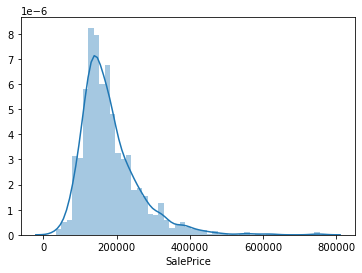

In [5]:
#histogram
sns.distplot(df_train['SalePrice']);

### ヒストグラムの観察結果
- Deviate from the normal distribution.
- Have appreciable positive skewness.
- Show peakedness.

### 歪度（skewness）と尖度（kurtosis）を見てみよう
- https://qiita.com/ymmy02/items/36e708d3d9e5e4e6a457
- 歪度(Skewness) : 分布の非対称性を示す指標。値が正であると分布が右に伸びている。逆に負であると左に伸びている。
- 尖度(Kurtosis) : 正規分布を基準とした分布の鋭さの指標。正規分布の尖度を0と定義する場合と3と定義する場合がある。基準である正規分布の尖度よりも大きければ分布は尖っており、小さければ緩やかな分布である。

In [6]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


### 'SalePrice', her buddies and her interests
- <https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python#'SalePrice',-her-buddies-and-her-interests>

#### Relationship with numerical variables

##### GrLivArea と SalePrice の散布図
- 何となく線型？

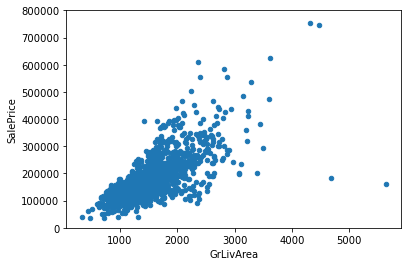

In [7]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

##### 'TotalBsmtSF' と SalePrice
- 傾きが大きい線型性？それとも指数的？
- 外れ値はどんなデータだろうか？

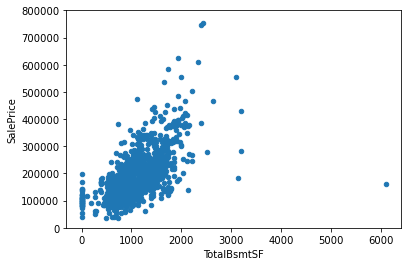

In [8]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

#### Relationship with categorical features

##### OverallQual と Saleprice の箱ひげ図
- 箱ひげ図の説明参考：[箱ひげ図のイメージ画像](https://mathtrain.jp/wp-content/uploads/2015/07/hakohige1.png)
- メモ：これ、どう読むといいのだろうか？

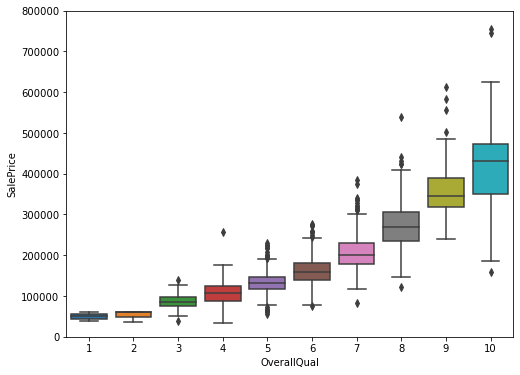

In [9]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

##### YearBuilt と SalePrice の箱ひげ図
- あまり強い関係はないようだが、どちらかといえば新しい方が好まれる？
- Note: we don't know if 'SalePrice' is in constant prices. Constant prices try to remove the effect of inflation. If 'SalePrice' is not in constant prices, it should be, so than prices are comparable over the years.

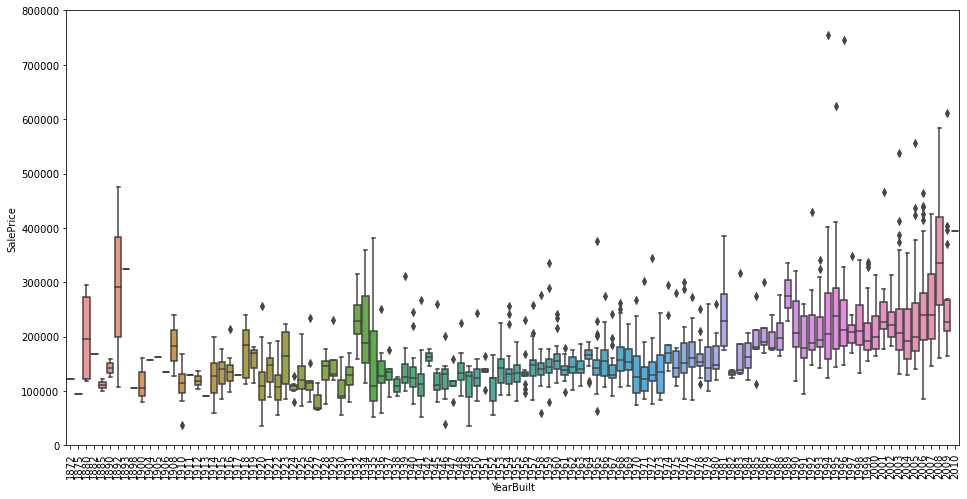

In [10]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

#### まとめ
- 'GrLivArea' と 'TotalBsmtSF' 
    - SalePrice と線型に相関している模様。
    - どちらも正の相関。
    - TotalBsmtSF での傾きは大きい。
- 'OverallQual' と 'YearBuilt'
    - SalePrice との相関はありそう
    - OverallQual の相関は大きそう
- 他にも調べるべき変数はある
- いいものと悪いものをよりわけよう（let's separate the wheat from the chaff.）

## 3. Keep calm and work smart
- https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python#3.-Keep-calm-and-work-smart
- 主観・直観に従って大事そうな量を調べてきた。
- 出発点は主観的だったといわざるを得ない。
- もっと客観性を重視して調べよう。

### The 'plasma soup'
- https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python#The-'plasma-soup'
- メモ：plasma は血漿。[血漿は蛋白や糖やミネラルを含んだ水分で、濃厚なスープ](https://www.weblio.jp/content/Plasma)とのことなので、ここから取っている模様。
- 次のレシピに従って調べていこう。
    - Correlation matrix (heatmap style).
    - 'SalePrice' correlation matrix (zoomed heatmap style).
    - Scatter plots between the most correlated variables (move like Jagger style).

#### ヒートマップ形式の相関行列

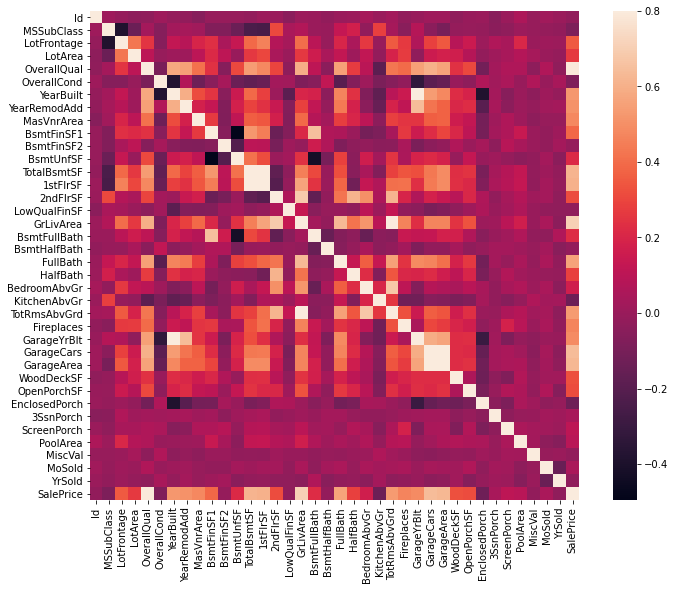

In [11]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

### TODO
- ヒートマップは概要を見るのに便利：seaborn は素晴らしい。

# （時間があれば後でやる）notebook: 欠損値の処理
- https://www.kaggle.com/dansbecker/handling-missing-values を見てみる
- [Learn Machine Learning](https://www.kaggle.com/learn/overview) カリキュラムのパート 2 の内容とのこと。

## イントロダクション
- 欠損値の扱いにはいろいろな方法がある
- 例
    - 2 つのベッドルームがある家は 3 つめのベッドルームの大きさの情報を含まない
    - 調査対象の人は収入をシェアするのを選ばないかもしれない
- とりあえず欠損の状況を確認してみよう

In [12]:
missing_val_count_by_column = df_train.isnull().sum()
print(missing_val_count_by_column[missing_val_count_by_column > 0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


## どう対応するか？
- <https://www.kaggle.com/dansbecker/handling-missing-values>

### 1) 単純に欠損値を落とす
- 使える情報が減るので、一般にはいい手ではない
- 学習データだけではなくテストデータからも落とすのを忘れないように

In [13]:
data_without_missing_values = df_train.dropna(axis=1)
data_without_missing_values.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0        1          60       RL     8450   Pave      Reg         Lvl   
1        2          20       RL     9600   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1         Lvl   
3        4          70       RL     9550   Pave      IR1         Lvl   
4        5          60       RL    14260   Pave      IR1         Lvl   
...    ...         ...      ...      ...    ...      ...         ...   
1455  1456          60       RL     7917   Pave      Reg         Lvl   
1456  1457          20       RL    13175   Pave      Reg         Lvl   
1457  1458          70       RL     9042   Pave      Reg         Lvl   
1458  1459          20       RL     9717   Pave      Reg         Lvl   
1459  1460          20       RL     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0       AllPub    Inside

In [14]:
cols_with_missing = [col for col in df_train.columns 
                                 if df_train[col].isnull().any()]
reduced_df_train = df_train.drop(cols_with_missing, axis=1)
reduced_df_test = df_test.drop(cols_with_missing, axis=1)

### 2) データの補完 (imputation)